In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom
import math
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:/Users/shiva/OneDrive/Desktop/walmart_data.csv")

In [3]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
data.shape

(550068, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
data[cols] = data[cols].astype('object')

In [7]:
data.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


<font size="14">**Outlier Detection**<font>


In [8]:
data.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [9]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

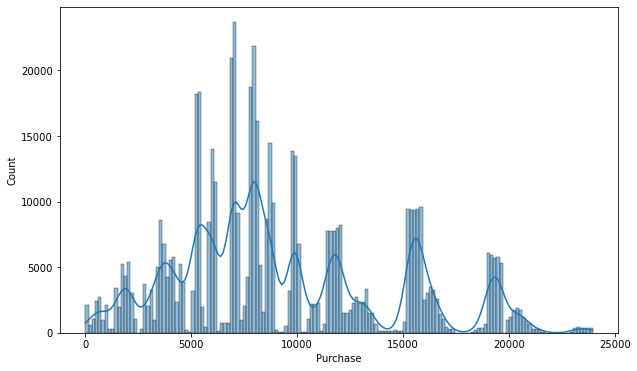

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Purchase', kde=True)
plt.show()

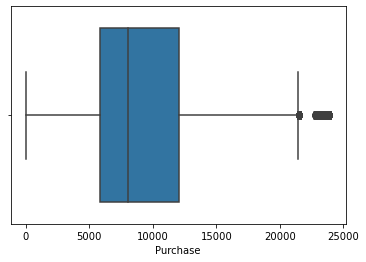

In [11]:
sns.boxplot(data=data, x='Purchase', orient='h')
plt.show()

<font size="6">**Observations**<font>
    
1. There are outliers in Purchase .
    


<font size="14">**Univariate Analysis**</font>

In [12]:
data["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [13]:
data["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [14]:
data["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [15]:
data.groupby("Gender")["User_ID"].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [16]:
data["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [17]:
data["Marital_Status"]=data["Marital_Status"].replace([0,1],["Single","Married"])

In [18]:
data["Marital_Status"].value_counts()

Single     324731
Married    225337
Name: Marital_Status, dtype: int64

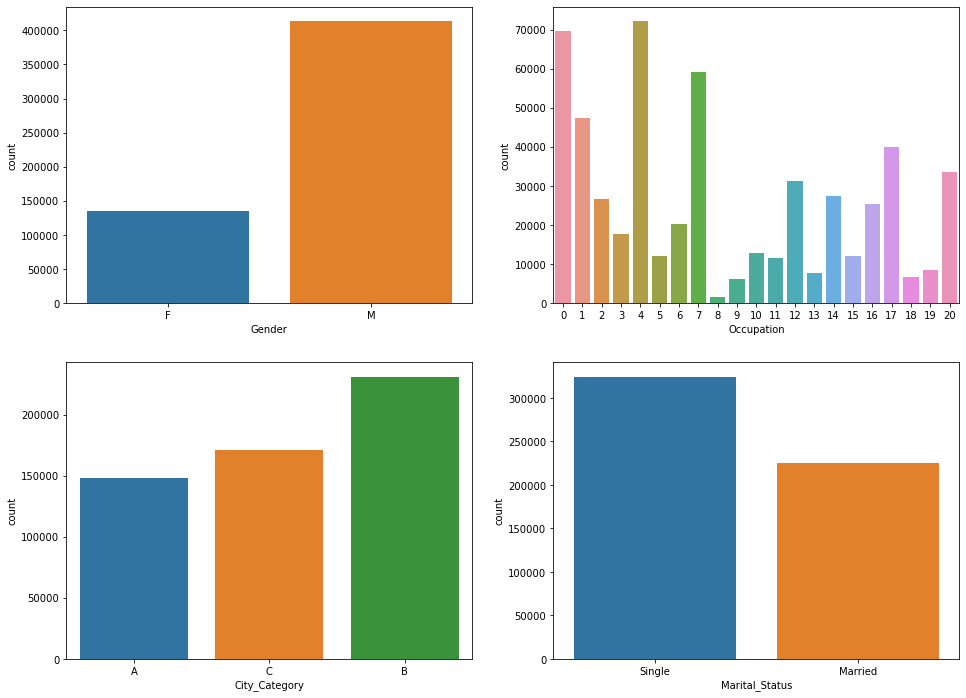

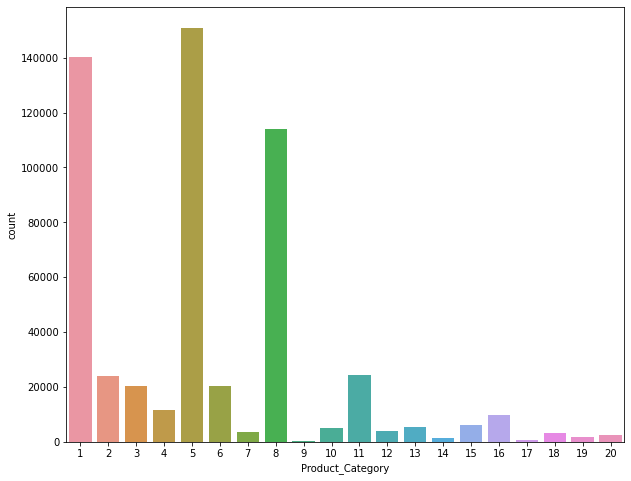

In [19]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=data, x='Gender', ax=axs[0,0])
sns.countplot(data=data, x='Occupation', ax=axs[0,1])
sns.countplot(data=data, x='City_Category', ax=axs[1,0])
sns.countplot(data=data, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='Product_Category')
plt.show()

<font size="14">**Bi-Variate Analysis**<font>

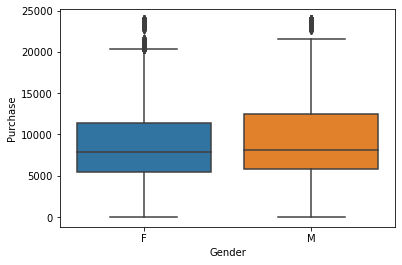

In [20]:
sns.boxplot(x="Gender",y="Purchase",data=data)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

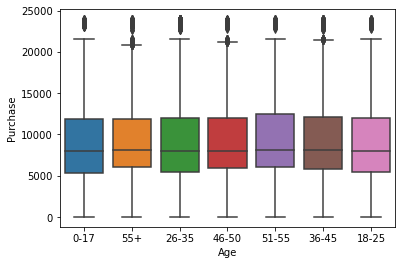

In [21]:
sns.boxplot(x="Age",y="Purchase",data=data)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

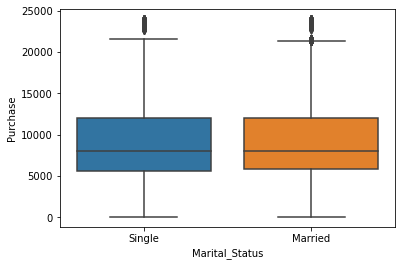

In [22]:
sns.boxplot(x="Marital_Status",y="Purchase",data=data)

<AxesSubplot:xlabel='Product_Category', ylabel='Purchase'>

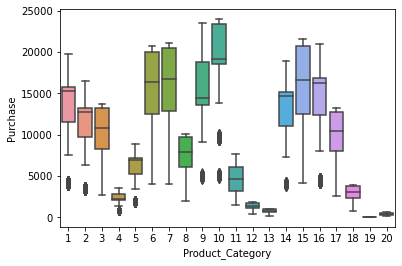

In [23]:
sns.boxplot(x="Product_Category",y="Purchase",data=data)

<font size=" 10">**Multivariate Analysis**<font size>

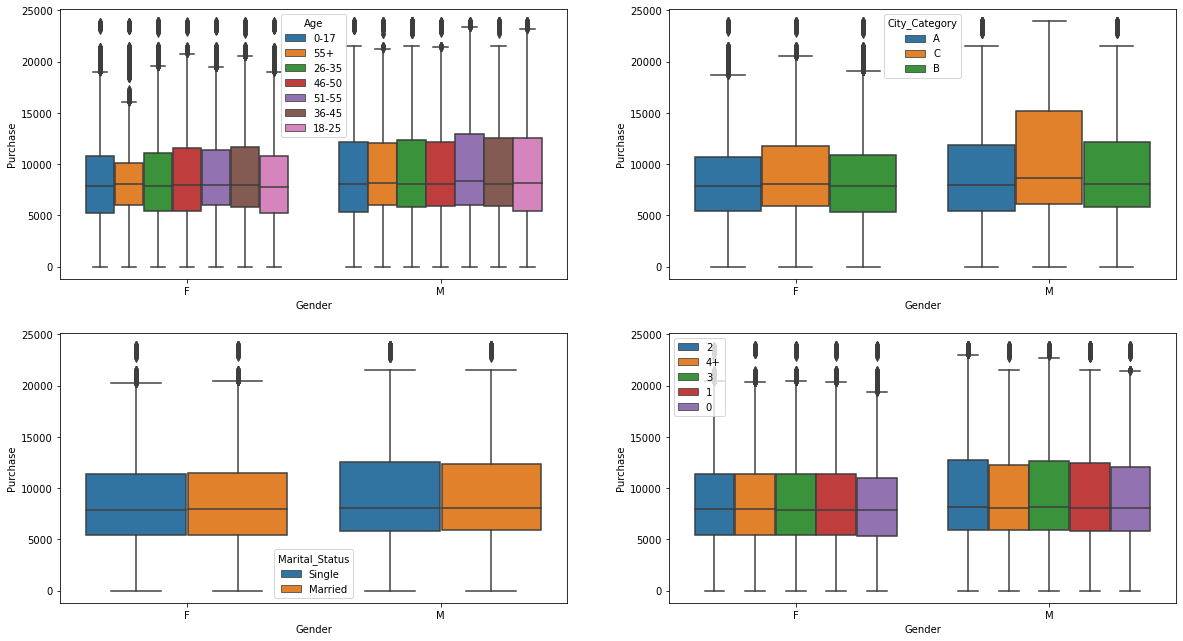

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=data, y="Purchase", x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=data, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])
sns.boxplot(data=data, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=data, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

In [25]:
s=300
iterations=1000

<font size="14">**Gender vs Purchase**<font >

In [26]:
male_sample_mean=[data[data["Gender"]=="M"].sample(s)["Purchase"].mean() for i in range(iterations)]

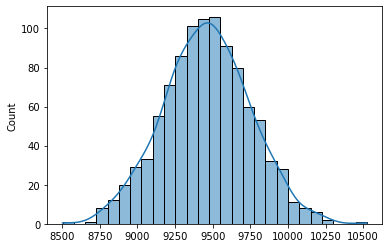

In [27]:
sns.histplot(x=male_sample_mean,kde=True)
plt.show()

In [28]:
m_mean=np.mean(male_sample_mean)

In [29]:
female_sample_mean=[data[data["Gender"]=="F"].sample(s)["Purchase"].mean() for i in range(iterations)]

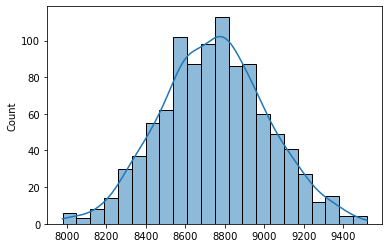

In [30]:
sns.histplot(x=female_sample_mean,kde=True)
plt.show()

In [31]:
f_mean=np.mean(female_sample_mean)

<font size="8">**Confidence Interval**</font>

<font size="4">**99% Confidence Interval**</font>

In [32]:
male_lower_interval_limit=m_mean-2.58*(np.std(male_sample_mean))
male_upper_interval_limit=m_mean+2.58*(np.std(female_sample_mean))
(male_lower_interval_limit,male_upper_interval_limit)

(8717.631500467638, 10153.256346662705)

In [33]:
female_lower_interval_limit=f_mean-2.58*(np.std(female_sample_mean))
female_upper_interval_limit=f_mean+2.58*(np.std(female_sample_mean))
(female_lower_interval_limit,female_upper_interval_limit)


(8054.327933337297, 9439.925173329371)

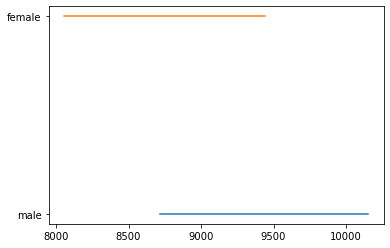

In [34]:
plt.plot((male_lower_interval_limit, male_upper_interval_limit), [0, 0])

plt.plot((female_lower_interval_limit, female_upper_interval_limit), [1, 1])
for i in range(2):
    plt.annotate([male_lower_interval_limit,male_upper_interval_limit],xy=[1,2])

plt.yticks(range(2), ["male", "female"])

plt.show()

<font size="4">**95% Confidence Interval**</font>

In [35]:
male_lower_interval_limit=m_mean-1.96*(np.std(male_sample_mean))

In [36]:
male_upper_interval_limit=m_mean+1.96*(np.std(female_sample_mean))

In [37]:
print("MALE PURCHASE CONFIDENCE INTERVAL FOR POPULATION MEAN:- {:.2f} ,{:.2f} ".format(male_lower_interval_limit,male_upper_interval_limit))

MALE PURCHASE CONFIDENCE INTERVAL FOR POPULATION MEAN:- 8896.14 ,9986.77 


In [38]:
female_lower_interval_limit=f_mean-1.96*(np.std(female_sample_mean))

In [39]:
female_upper_interval_limit=f_mean+1.96*(np.std(female_sample_mean))

In [40]:
print("FEMALE PURCHASE CONFIDENCE INTERVAL FOR POPULATION MEAN:- {:.2f} ,{:.2f} ".format(female_lower_interval_limit,female_upper_interval_limit))

FEMALE PURCHASE CONFIDENCE INTERVAL FOR POPULATION MEAN:- 8220.81 ,9273.44 


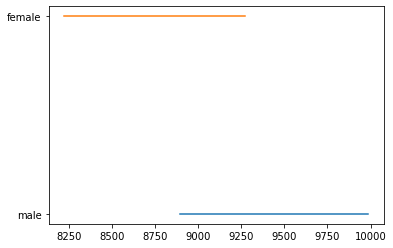

In [41]:
plt.plot((male_lower_interval_limit, male_upper_interval_limit), [0, 0])

plt.plot((female_lower_interval_limit, female_upper_interval_limit), [1, 1])

plt.yticks(range(2), ["male", "female"])

plt.show()


<font size="4">**90% Confidence Interval**</font>

In [42]:

male_lower_interval_limit=m_mean-1.64*(np.std(male_sample_mean))
male_upper_interval_limit=m_mean+1.64*(np.std(female_sample_mean))
print("MALE PURCHASE CONFIDENCE INTERVAL FOR POPULATION MEAN:- {:.2f} ,{:.2f} ".format(male_lower_interval_limit,male_upper_interval_limit))

MALE PURCHASE CONFIDENCE INTERVAL FOR POPULATION MEAN:- 8988.27 ,9900.84 


In [43]:
female_lower_interval_limit=f_mean-1.64*(np.std(female_sample_mean))
female_upper_interval_limit=f_mean+1.64*(np.std(female_sample_mean))
print("FEMALE PURCHASE CONFIDENCE INTERVAL FOR POPULATION MEAN:- {:.2f} ,{:.2f} ".format(female_lower_interval_limit,female_upper_interval_limit))

FEMALE PURCHASE CONFIDENCE INTERVAL FOR POPULATION MEAN:- 8306.74 ,9187.51 


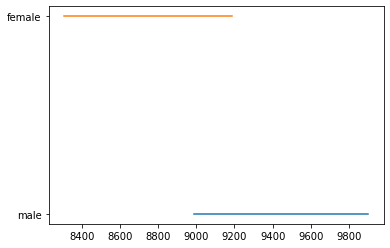

In [44]:
plt.plot((male_lower_interval_limit, male_upper_interval_limit), [0, 0])

plt.plot((female_lower_interval_limit, female_upper_interval_limit), [1, 1])

plt.yticks(range(2), ["male", "female"])

plt.show()

<font size="14">**Marital_Status vs Purchase**<font >

In [45]:
data.groupby("Marital_Status")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Married,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0
Single,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0


In [46]:
 Married_sample_mean_dist=[data[data["Marital_Status"]=="Married"].sample(s)["Purchase"].mean() for i in range(iterations)]

In [47]:
Single_sample_mean_dist=[data[data["Marital_Status"]=="Single"].sample(s)["Purchase"].mean() for i in range(iterations)]

In [48]:
Married_mean_of_sample_mean=np.mean(Married_sample_mean_dist)

In [49]:
Single_mean_of_sample_mean=np.mean(Single_sample_mean_dist)

<AxesSubplot:ylabel='Count'>

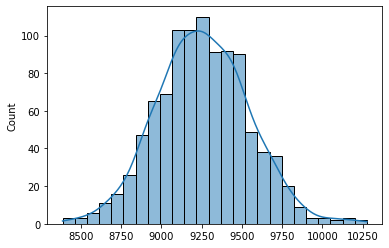

In [50]:
sns.histplot(x=Married_sample_mean_dist,kde=True)

<AxesSubplot:ylabel='Count'>

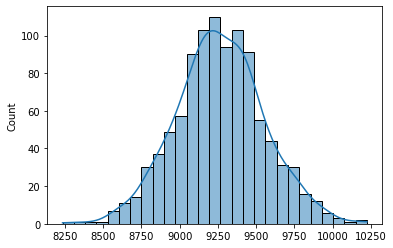

In [51]:
sns.histplot(x=Single_sample_mean_dist,kde=True)

<font size="8">**Confidence Interval**</font>

<font size="4">**99% Confidence Interval**</font>

In [52]:
lower_interval_limit_Single=Single_mean_of_sample_mean-2.58*(np.std(Single_sample_mean_dist))
upper_interval_limit_Single=Single_mean_of_sample_mean+2.58*(np.std(Single_sample_mean_dist))
(lower_interval_limit_Single,upper_interval_limit_Single)

(8521.121021197492, 10005.498118802507)

In [53]:
lower_interval_limit_Married=Married_mean_of_sample_mean-2.58*(np.std(Married_sample_mean_dist))
upper_interval_limit_Married=Married_mean_of_sample_mean+2.58*(np.std(Married_sample_mean_dist))
(lower_interval_limit_Married,upper_interval_limit_Married)

(8522.718295658055, 9993.636511008615)

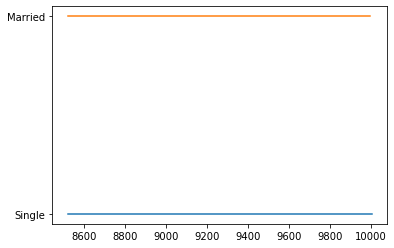

In [54]:
plt.plot((lower_interval_limit_Single, upper_interval_limit_Single), [0, 0])

plt.plot((lower_interval_limit_Married, upper_interval_limit_Married), [1, 1])

plt.yticks(range(2), ["Single", "Married"])

plt.show()

<font size="4">**95% Confidence Interval**</font>

In [55]:
lower_interval_limit_Single=Single_mean_of_sample_mean-1.96*(np.std(Single_sample_mean_dist))
upper_interval_limit_Single=Single_mean_of_sample_mean+1.96*(np.std(Single_sample_mean_dist))
(lower_interval_limit_Single,upper_interval_limit_Single)

(8699.47640889422, 9827.14273110578)

In [56]:
lower_interval_limit_Married=Married_mean_of_sample_mean-1.96*(np.std(Married_sample_mean_dist))
upper_interval_limit_Married=Married_mean_of_sample_mean+1.96*(np.std(Married_sample_mean_dist))
(lower_interval_limit_Married,upper_interval_limit_Married)

(8699.456530835834, 9816.898275830836)

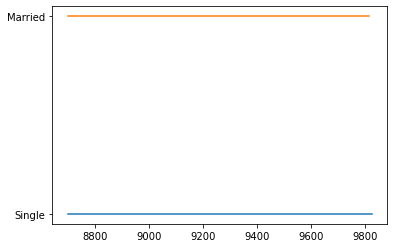

In [57]:
plt.plot((lower_interval_limit_Single, upper_interval_limit_Single), [0, 0])

plt.plot((lower_interval_limit_Married, upper_interval_limit_Married), [1, 1])

plt.yticks(range(2), ["Single", "Married"])

plt.show()

<font size="4">**90% Confidence Interval**</font>

In [58]:
lower_interval_limit_Single=Single_mean_of_sample_mean-1.645*(np.std(Single_sample_mean_dist))
upper_interval_limit_Single=Single_mean_of_sample_mean+1.645*(np.std(Single_sample_mean_dist))
(lower_interval_limit_Single,upper_interval_limit_Single)

(8790.092452643363, 9736.526687356636)

In [59]:
lower_interval_limit_Married=Married_mean_of_sample_mean-1.645*(np.std(Married_sample_mean_dist))
upper_interval_limit_Married=Married_mean_of_sample_mean+1.645*(np.std(Married_sample_mean_dist))
(lower_interval_limit_Married,upper_interval_limit_Married)

(8789.250956772934, 9727.103849893736)

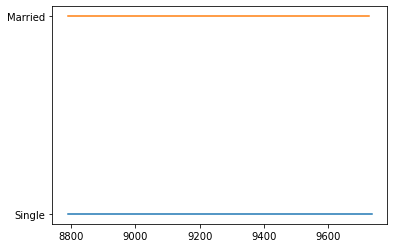

In [60]:
plt.plot((lower_interval_limit_Single, upper_interval_limit_Single), [0, 0])

plt.plot((lower_interval_limit_Married, upper_interval_limit_Married), [1, 1])

plt.yticks(range(2), ["Single", "Married"])

plt.show()

<font size="14">**Age vs Purchase**<font >

In [61]:
amt_df = data.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df




,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [62]:
data1=data.groupby(["User_ID","Age"])[["Purchase"]].mean()

In [63]:
amt_df["Age"].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

<font size="8">**Confidence Interval**</font>

<font size="4">**99% Confidence Interval**</font>

 age 26-35 : confidence interval of means=(840029.35, 1143479.05)
 age 36-45 : confidence interval of means=(729653.77, 1029517.28)
 age 18-25 : confidence interval of means=(718875.67, 985099.35)
 age 46-50 : confidence interval of means=(658266.43, 929862.40)
 age 51-55 : confidence interval of means=(645965.65, 877616.70)
 age 55+ : confidence interval of means=(444247.27, 637934.60)
 age 0-17 : confidence interval of means=(514793.50, 720126.01)


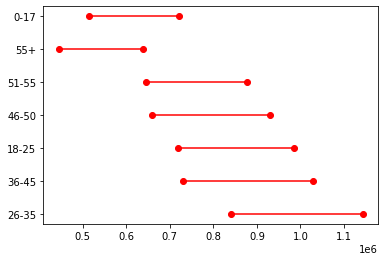

In [64]:
w=['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
lower_list=[]
upper_list=[]
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    sample_mean_distribution=[]
    for i in range(iterations):
    
        new_df = amt_df[amt_df['Age']==val] 
        sample_mean = new_df.sample(s,replace=True)['Purchase'].mean()
        sample_mean_distribution.append(sample_mean)    
    a=np.mean(sample_mean_distribution)
    lower_limit=a-2.58*np.std(sample_mean_distribution)
    upper_limit=a+2.58*np.std(sample_mean_distribution)
    
    print(" age {} : confidence interval of means=({:.2f}, {:.2f})".format(val, lower_limit, upper_limit))
    lower_list.append(lower_limit)
    upper_list.append(upper_limit)

data_dict = {}
data_dict['category'] = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
data_dict['lower'] = lower_list
data_dict['upper'] = upper_list
dataset = pd.DataFrame(data_dict)
    
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-')
plt.yticks(range(len(dataset)),list(dataset['category']))
plt.show()
 


<font size="4">**95% Confidence Interval**</font>

 age 26-35 : confidence interval of means=(876435.96, 1104823.87)
 age 36-45 : confidence interval of means=(767865.68, 989408.77)
 age 18-25 : confidence interval of means=(750902.95, 961924.01)
 age 46-50 : confidence interval of means=(689713.91, 900322.91)
 age 51-55 : confidence interval of means=(670381.51, 851293.15)
 age 55+ : confidence interval of means=(468466.40, 609064.67)
 age 0-17 : confidence interval of means=(541191.02, 699701.09)


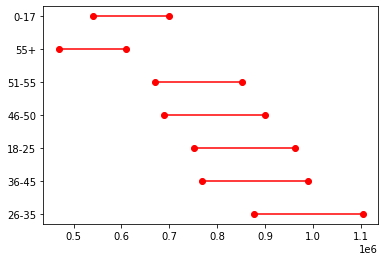

In [65]:
w=['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
lower_list=[]
upper_list=[]
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    sample_mean_distribution=[]
    for i in range(iterations):
    
        new_df = amt_df[amt_df['Age']==val] 
        sample_mean = new_df.sample(s,replace=True)['Purchase'].mean()
        sample_mean_distribution.append(sample_mean)    
    a=np.mean(sample_mean_distribution)
    lower_limit=a-1.96*np.std(sample_mean_distribution)
    upper_limit=a+1.96*np.std(sample_mean_distribution)
    
    print(" age {} : confidence interval of means=({:.2f}, {:.2f})".format(val, lower_limit, upper_limit))
    lower_list.append(lower_limit)
    upper_list.append(upper_limit)

data_dict = {}
data_dict['category'] = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
data_dict['lower'] = lower_list
data_dict['upper'] = upper_list
dataset = pd.DataFrame(data_dict)
    
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-')
plt.yticks(range(len(dataset)),list(dataset['category']))
plt.show()
 

<font size="4">**90% Confidence Interval**</font>

 age 26-35 : confidence interval of means=(889620.36, 1086352.31)
 age 36-45 : confidence interval of means=(785344.94, 973230.97)
 age 18-25 : confidence interval of means=(774807.07, 937327.28)
 age 46-50 : confidence interval of means=(705538.00, 880699.74)
 age 51-55 : confidence interval of means=(687659.60, 837664.20)
 age 55+ : confidence interval of means=(479256.51, 599222.16)
 age 0-17 : confidence interval of means=(551601.37, 681757.33)


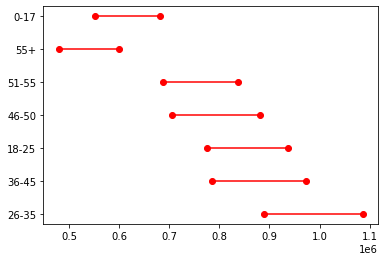

In [66]:
w=['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
lower_list=[]
upper_list=[]
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    sample_mean_distribution=[]
    for i in range(iterations):
    
        new_df = amt_df[amt_df['Age']==val] 
        sample_mean = new_df.sample(s,replace=True)['Purchase'].mean()
        sample_mean_distribution.append(sample_mean)    
    a=np.mean(sample_mean_distribution)
    lower_limit=a-1.645*np.std(sample_mean_distribution)
    upper_limit=a+1.645*np.std(sample_mean_distribution)
    
    print(" age {} : confidence interval of means=({:.2f}, {:.2f})".format(val, lower_limit, upper_limit))
    lower_list.append(lower_limit)
    upper_list.append(upper_limit)

data_dict = {}
data_dict['category'] = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
data_dict['lower'] = lower_list
data_dict['upper'] = upper_list
dataset = pd.DataFrame(data_dict)
    
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-')
plt.yticks(range(len(dataset)),list(dataset['category']))
plt.show()
 

<font size="14">**Insights**<font>

<font size="6">**#Gender Related**<font>

1. Male customers spend more than female customers and we can see :-
    * for 99% interval :- MALE = (8660.93, 10150.21),Female = (8033.46, 9463.13)
    * for 95% interval :- MALE = (8847.04 ,9978.44 ),Female = (8205.25 ,9291.36)
    * for 90% interval :- MALE = (8943.10 ,9889.78 ),Female = (8293.91 ,9202.70)
  *  the difference is not very significant 


<font size="6">**#Age Related**<font>

1. There is no significant difference in purchasing patterns among differnt age groups .
2. Male customers in all age groups tend to spend mpre then their female counterparts.
3. It is clearly visible that age groups in the 18-50 spend more on average .
   

<font size="6">**#Marital_Status Related**<font>

1. There is no significant difference among Married and Single Customers , as seen the confidence intervals completely overlap:-
    * for 99% interval:- Single (8515.41, 10000.98), Married (8501.39, 10015.50)
    * for 95% interval:- Single (8693.91, 9822.48), Married (8683.32, 9833.57)
    * for 90% interval:- Single (8784.60, 9731.79), Married (8775.75, 9741.14)

<font size="6">**#Product_Category_Related**<font>

1. Products 1,5,8,11 are the products highly in demand and generate major revenue for the company 

<font size="6">**#City_Related**<font>

1. More Customers are in city B as compared to other two cities .
2. Customers in City C tend to spend more as compared to other cities.

<font size="14">**Recommendations**<font>

1. As Products 1,5,8,11 genrate more revenue for the company, more discounts , schemes, offers should be made .
2. Other products should also be made attarctive by quantity discounts, buy get one offers .
3. As we have more customers in B City, and as male customers are more in number over there, we should target the males with the 
    products and schemes to drive sales over there .
4. High or more Price products should be launched and made accessible in City C .
5. Age groups in the the category 18-50 are promising fot the company
6. The company should launch new products specifically for the age group 26-35 , as they are the more aggressive spenders .
7. The Single customers > Married Customers so we need to bring them in the loop and icrease their contribution to sales .
8. Customers with Occupation as [0,1,4,7,17] need to be targeted products:- tailormade or necessary or more suitable to their professions.
